# Implement Gradient Descent Algorithm for Multiple Linear Regression

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
data = pd.read_csv("auto_mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Explanation of the Data**

This data tabulates "miles per gallon (mpg)" of different cars with different number of cylinders, displacement, power of the engine (in hp), weight of the car (in kg), accelaration of the car, model_year

For our exercise we shall choose the explanatory variables / predictors:

- displacement
- horsepower
- weight
- accelaration

All of these variables are quantitative in nature.

and our target variable is: mpg

In [4]:
data.shape

(398, 9)

So we have 398 datapoints. 

We will consider 300 randomly chosen datapoints as our training samples and rest of the data as test samples.

In [6]:
features = ['displacement', 'horsepower', 'weight', 'acceleration']
target = ['mpg']

## Data Preprocessing

In [11]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    float64
 3   acceleration  398 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


In [13]:
data[data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


### drop the rows where horsepower is '?'

In [35]:
data = data.drop(data[data['horsepower']=='?'].index).reset_index(drop=True)

In [37]:
data['horsepower'] = data['horsepower'].values.astype('float')

In [39]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   horsepower    392 non-null    float64
 2   weight        392 non-null    float64
 3   acceleration  392 non-null    float64
dtypes: float64(4)
memory usage: 12.4 KB


## Choose X and y

In [38]:
X = data[features].values
y = data[target].values

### Split the data into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300)

## Univariate analysis

### displacement

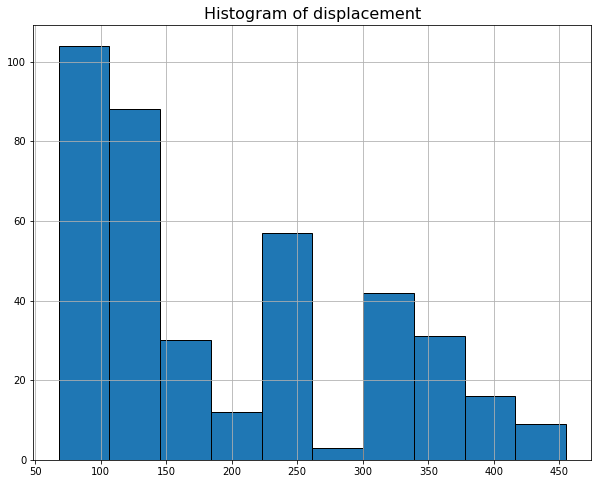

In [48]:
plt.figure(figsize=(10,8))
plt.hist(data['displacement'], edgecolor='k')
plt.grid()
plt.title("Histogram of displacement", fontsize=16)
plt.show()

### horsepower

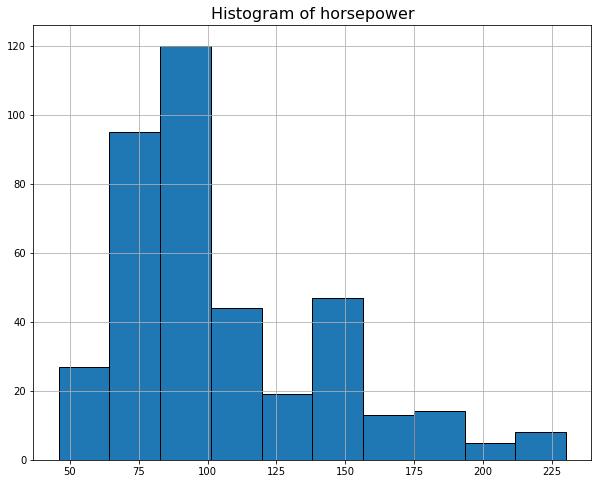

In [49]:
plt.figure(figsize=(10,8))
plt.hist(data['horsepower'], edgecolor='k')
plt.grid()
plt.title("Histogram of horsepower", fontsize=16)
plt.show()

### weight

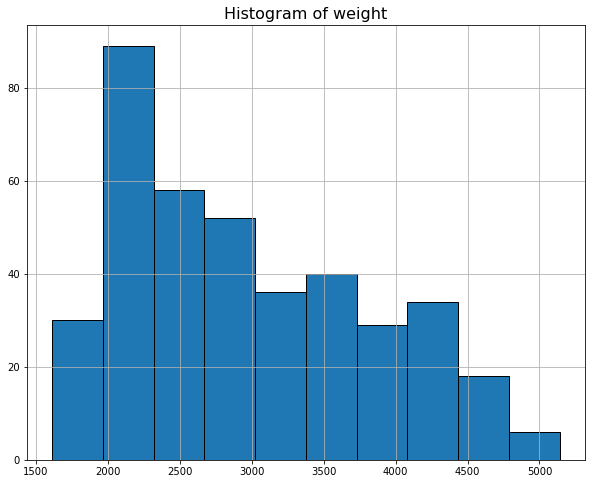

In [50]:
plt.figure(figsize=(10,8))
plt.hist(data['weight'], edgecolor='k')
plt.grid()
plt.title("Histogram of weight", fontsize=16)
plt.show()

### acceleration

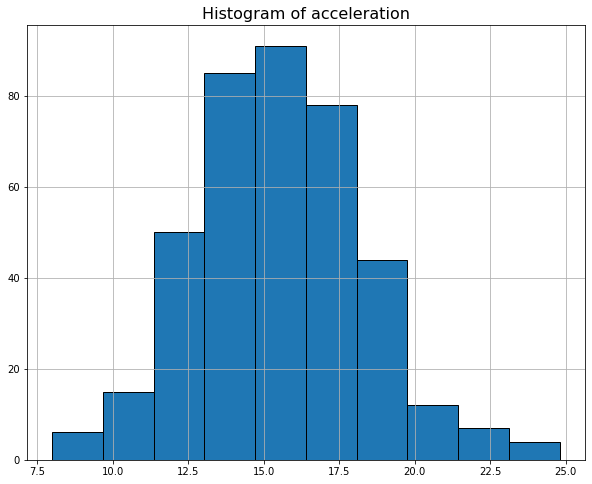

In [51]:
plt.figure(figsize=(10,8))
plt.hist(data['acceleration'], edgecolor='k')
plt.grid()
plt.title("Histogram of acceleration", fontsize=16)
plt.show()

## Feature Scaling

For gradient descent to work better we need features to be within same scale. 
We need to perform feature scaling in order to make gradient descent work better.

In [68]:
for i in range(X_train.shape[1]):
    minimum = X_train[:,i].min()
    maximum = X_train[:,i].max()
    X_train[:,i] = (X_train[:,i] - minimum)/(maximum - minimum)
    X_test[:,i] = (X_test[:,i] - minimum)/(maximum - minimum)

In [69]:
X_train

array([[0.13953488, 0.18994413, 0.23759569, 0.51204819],
       [0.93281654, 0.84916201, 0.77346187, 0.12048193],
       [0.04392765, 0.13407821, 0.09413099, 0.53012048],
       ...,
       [0.17054264, 0.27374302, 0.26850014, 0.37349398],
       [0.17054264, 0.24581006, 0.31131273, 0.45180723],
       [0.47028424, 0.30167598, 0.48653246, 0.45180723]])

## Gradient Descent Algorithm

### Step-1: initialize model parameters with random values

We will have k+1 model parameters if we have k features

In [79]:
k = len(features)

In [82]:
theta = np.random.rand(k+1)

In [83]:
theta

array([0.56403541, 0.13511692, 0.76528868, 0.13994414, 0.54918837])

### Step-2: add $x_0$ with all 1

In [84]:
x_0_train = np.ones(shape=X_train.shape[0])

In [86]:
x_0_train.shape

(300,)

In [89]:
X_train = np.hstack((x_0_train.reshape(-1,1), X_train))

In [90]:
x_0_test = np.ones(shape=X_test.shape[0])
X_test = np.hstack((x_0_test.reshape(-1,1), X_test))

In [92]:
X_train.shape

(300, 5)

In [93]:
X_test.shape

(92, 5)

### Create a function that predicts the target variable

In [109]:
def predict(params, X):
    return (params.reshape(1,-1) @ X.T).T

In [114]:
y_pred = predict(theta, X_train)

In [118]:
y_pred.shape, y_train.shape, X_train.shape, theta.shape

((300, 1), (300, 1), (300, 5), (5,))

### Cost function

In [156]:
def cost_function(y_pred, y_actual):
    errors = y_pred - y_actual
    return np.square(errors).sum()/(2*y_pred.shape[0])

### Gradient descent update rule

In [204]:
def gradient_descent(X_values, y_values, theta_init, tolerance = 0.0001, iterations = 1000, alpha = 0.01, alpha_scaling = False):
    """
    inputs:
    -------
    X_values : training samples of features
    y_values : values of target varaible
    theta_init : initial values of model parameters
    tolerance : the minimum change in theta required
    iterations : total number of iterations
    alpha : learning rate
    alpha_scaling : moderate the value of learning rate
    
    output:
    -------
    theta : model parameter optmized
    cost_values : array of cost values
    """
    cost_values = []
    theta = theta_init
    it = 0
    m = X_values.shape[0]
    alpha_max = alpha
    alpha_min = alpha/100
    while(it < iterations):
        y_pred = predict(theta, X_values)
        cost = cost_function(y_pred, y_values)
        cost_values.append(cost)
        # alpha scaling
        if alpha_scaling:
            alpha = alpha_min + ((alpha_max - alpha_min)/(iterations))*it
        del_theta = ((-1*alpha / m) * (X_values.T @ (y_pred - y_values)).flatten())
        theta = theta + del_theta
        it += 1
        ## stopping criteria
        del_theta_mag = np.linalg.norm(del_theta)
        if del_theta_mag < tolerance:
            break
    return theta, cost_values

In [205]:
model_params, costs = gradient_descent(X_train, y_train, theta, iterations=10000, alpha=0.1, tolerance=0.0001)

In [206]:
model_params

array([ 35.50287664,  -4.49292553,  -9.20209906, -16.63557513,
        -2.62898083])

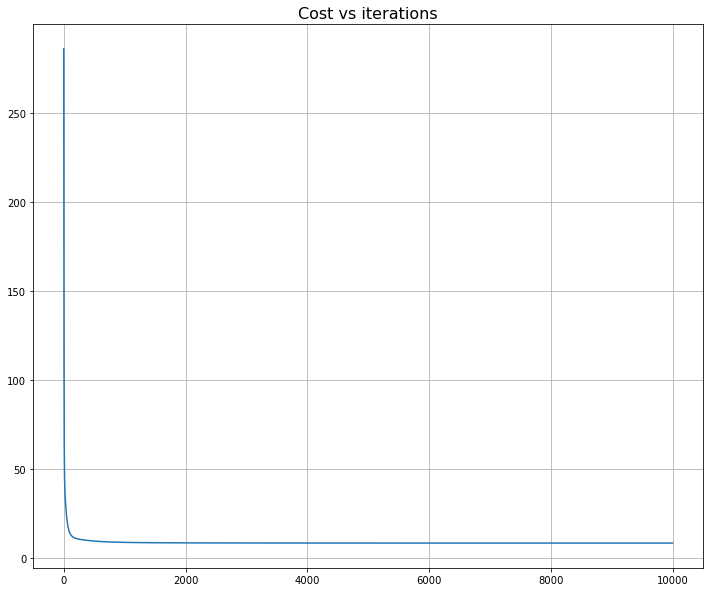

In [207]:
plt.figure(figsize=(12,10))
plt.plot(costs)
plt.grid()
plt.title("Cost vs iterations", fontsize=16)
plt.show()

## Evaluation

### On the training dataset

In [208]:
model_output = predict(model_params, X_train)

In [209]:
pd.DataFrame(np.hstack((model_output, y_train, model_output-y_train)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,27.829366,26.0,1.829366
1,10.314001,15.0,-4.685999
2,31.112112,33.5,-2.387888
3,8.639821,12.0,-3.360179
4,23.316872,28.1,-4.783128
...,...,...,...
295,29.738943,25.0,4.738943
296,27.792116,28.0,-0.207884
297,26.769068,27.5,-0.730932
298,26.108014,29.8,-3.691986


In [210]:
cost_function(model_output, y_train)

8.567975182274044

### Evaluation on test dataset

In [213]:
model_output = predict(model_params, X_test)

In [214]:
pd.DataFrame(np.hstack((model_output, y_test, model_output-y_test)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,31.552041,31.9,-0.347959
1,23.287966,25.0,-1.712034
2,31.276556,32.0,-0.723444
3,12.697004,13.0,-0.302996
4,27.987535,27.2,0.787535
...,...,...,...
87,27.877417,25.5,2.377417
88,9.183509,12.0,-2.816491
89,12.419034,14.0,-1.580966
90,27.045591,27.4,-0.354409


In [215]:
cost_function(model_output, y_test)

10.215423578091139

## Using sklearn library to perform linear regression

In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
model = LinearRegression()

In [225]:
model.fit(X_train[:,1:], y_train)

LinearRegression()

### evaluation

In [226]:
y_pred_train = model.predict(X_train[:,1:])

In [227]:
pd.DataFrame(np.hstack((y_pred_train, y_train, y_pred_train-y_train)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,27.832379,26.0,1.832379
1,10.284609,15.0,-4.715391
2,31.102148,33.5,-2.397852
3,8.651680,12.0,-3.348320
4,23.303387,28.1,-4.796613
...,...,...,...
295,29.745725,25.0,4.745725
296,27.791963,28.0,-0.208037
297,26.777173,27.5,-0.722827
298,26.116437,29.8,-3.683563


In [228]:
cost_function(y_pred_train, y_train)

8.567467058849285

In [230]:
y_pred_test = model.predict(X_test[:,1:])

In [231]:
pd.DataFrame(np.hstack((y_pred_test, y_test, y_pred_test-y_test)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,31.581956,31.9,-0.318044
1,23.255149,25.0,-1.744851
2,31.293310,32.0,-0.706690
3,12.705193,13.0,-0.294807
4,27.966649,27.2,0.766649
...,...,...,...
87,27.847700,25.5,2.347700
88,9.215021,12.0,-2.784979
89,12.428564,14.0,-1.571436
90,27.081693,27.4,-0.318307


In [232]:
cost_function(y_pred_test, y_test)

10.239326747386452

In [233]:
model.intercept_

array([35.66659343])

In [234]:
model.coef_

array([[ -4.39658128,  -9.65562831, -16.46437418,  -2.88028245]])

In [235]:
model_params

array([ 35.50287664,  -4.49292553,  -9.20209906, -16.63557513,
        -2.62898083])